# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

### The Data Source

Dr Semmelweis published his research in 1861. The scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
df_yearly

year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

In [6]:
df_monthly

date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2
..        ...     ...     ...
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

[98 rows x 3 columns]

### Check for Nan Values and Duplicates

In [7]:
df_monthly.isna().any()
df_monthly.info()
df_monthly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2
..        ...     ...     ...
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

[98 rows x 3 columns]

### Descriptive Statistics

In [8]:
df_monthly.describe()

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, I calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [9]:
df_yearly["perc"] = df_yearly["deaths"] / df_yearly["births"] 
df_yearly

year  births  deaths    clinic  perc
0   1841    3036     237  clinic 1  0.08
1   1842    3287     518  clinic 1  0.16
2   1843    3060     274  clinic 1  0.09
3   1844    3157     260  clinic 1  0.08
4   1845    3492     241  clinic 1  0.07
5   1846    4010     459  clinic 1  0.11
6   1841    2442      86  clinic 2  0.04
7   1842    2659     202  clinic 2  0.08
8   1843    2739     164  clinic 2  0.06
9   1844    2956      68  clinic 2  0.02
10  1845    3241      66  clinic 2  0.02
11  1846    3754     105  clinic 2  0.03

# Visualise the Total Number of Births and Deaths over Time

### Plot the Monthly Data on Twin Axes

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

In [10]:
df_mont_yea = df_monthly.resample('Y', on='date').sum()
df_mont_yea

births  deaths
date                      
1841-12-31    2576     185
1842-12-31    3067     521
1843-12-31    2871     274
1844-12-31    2918     260
1845-12-31    3253     241
1846-12-31    3352     459
1847-12-31    3375     176
1848-12-31    3556      45
1849-12-31    1198      41

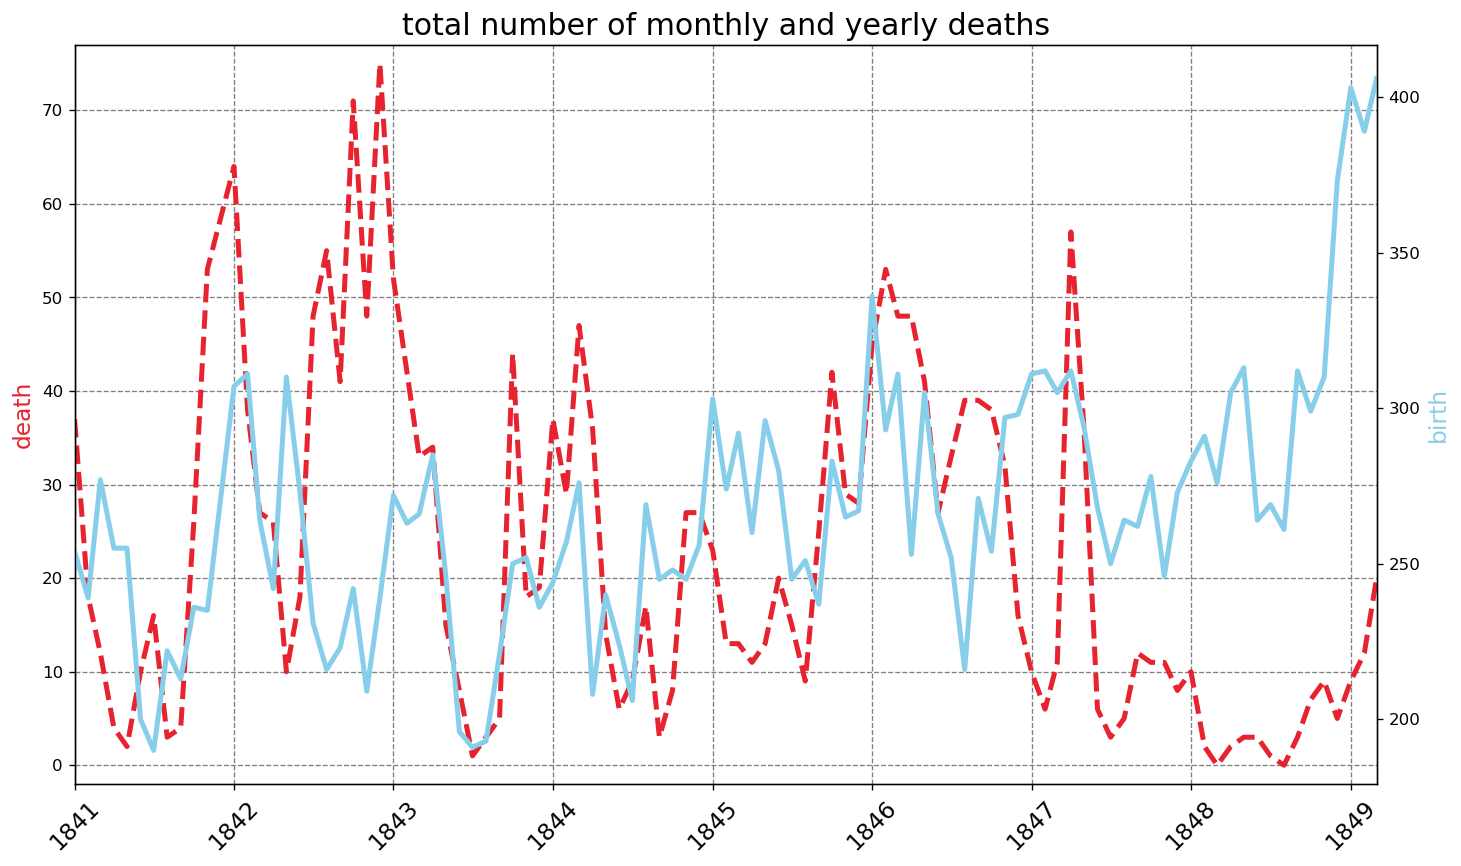

In [11]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('total number of monthly and yearly deaths', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('death', color='#E6232E', fontsize=14)
ax2.set_ylabel('birth', color='skyblue', fontsize=14)

ax1.grid(color='grey', linestyle='--')

# Set the minimum and maximum values on the axes
ax1.plot(df_monthly.date, df_monthly.deaths, color='#E6232E', linewidth=3, linestyle="--")
ax2.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)

ax1.set_ylim([df_monthly.deaths.min()-2, df_monthly.deaths.max()+2])
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [12]:
pivot_birth = np.round(pd.pivot_table(df_yearly, values='births', 
                                index="year",
                                columns='clinic'
                                ))
pivot_death = np.round(pd.pivot_table(df_yearly, values='deaths', 
                                index="year",
                                columns='clinic'
                                ))
pivot_death

clinic  clinic 1  clinic 2
year                      
1841         237        86
1842         518       202
1843         274       164
1844         260        68
1845         241        66
1846         459       105

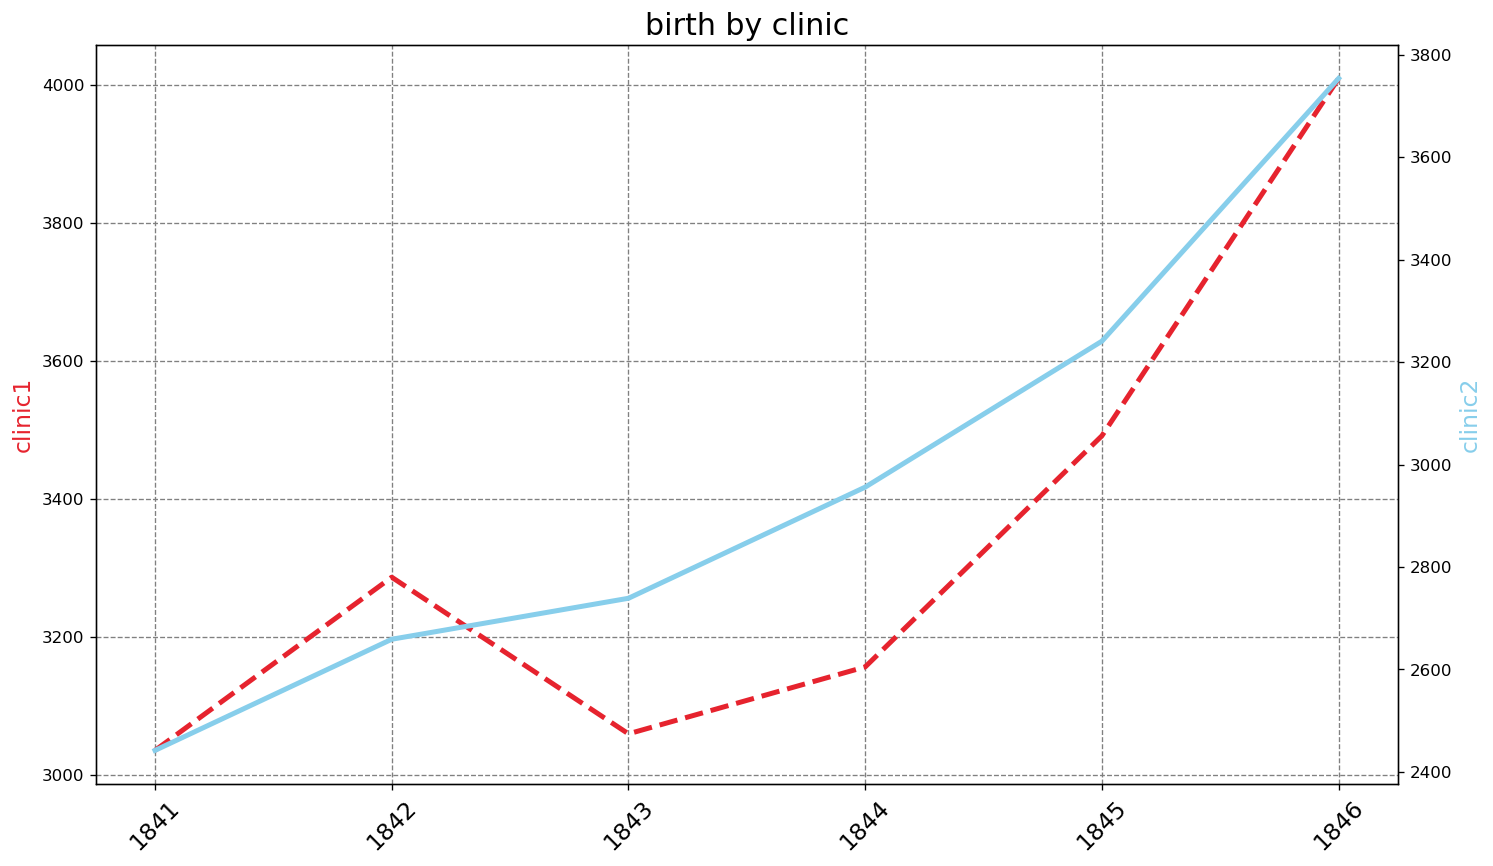

In [13]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('birth by clinic', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('clinic1', color='#E6232E', fontsize=14)
ax2.set_ylabel('clinic2', color='skyblue', fontsize=14)

ax1.grid(color='grey', linestyle='--')

# Set the minimum and maximum values on the axes
ax1.plot(pivot_birth.index, pivot_birth["clinic 1"], color='#E6232E', linewidth=3, linestyle="--")
ax2.plot(pivot_birth.index, pivot_birth["clinic 2"], color='skyblue', linewidth=3)


plt.show()

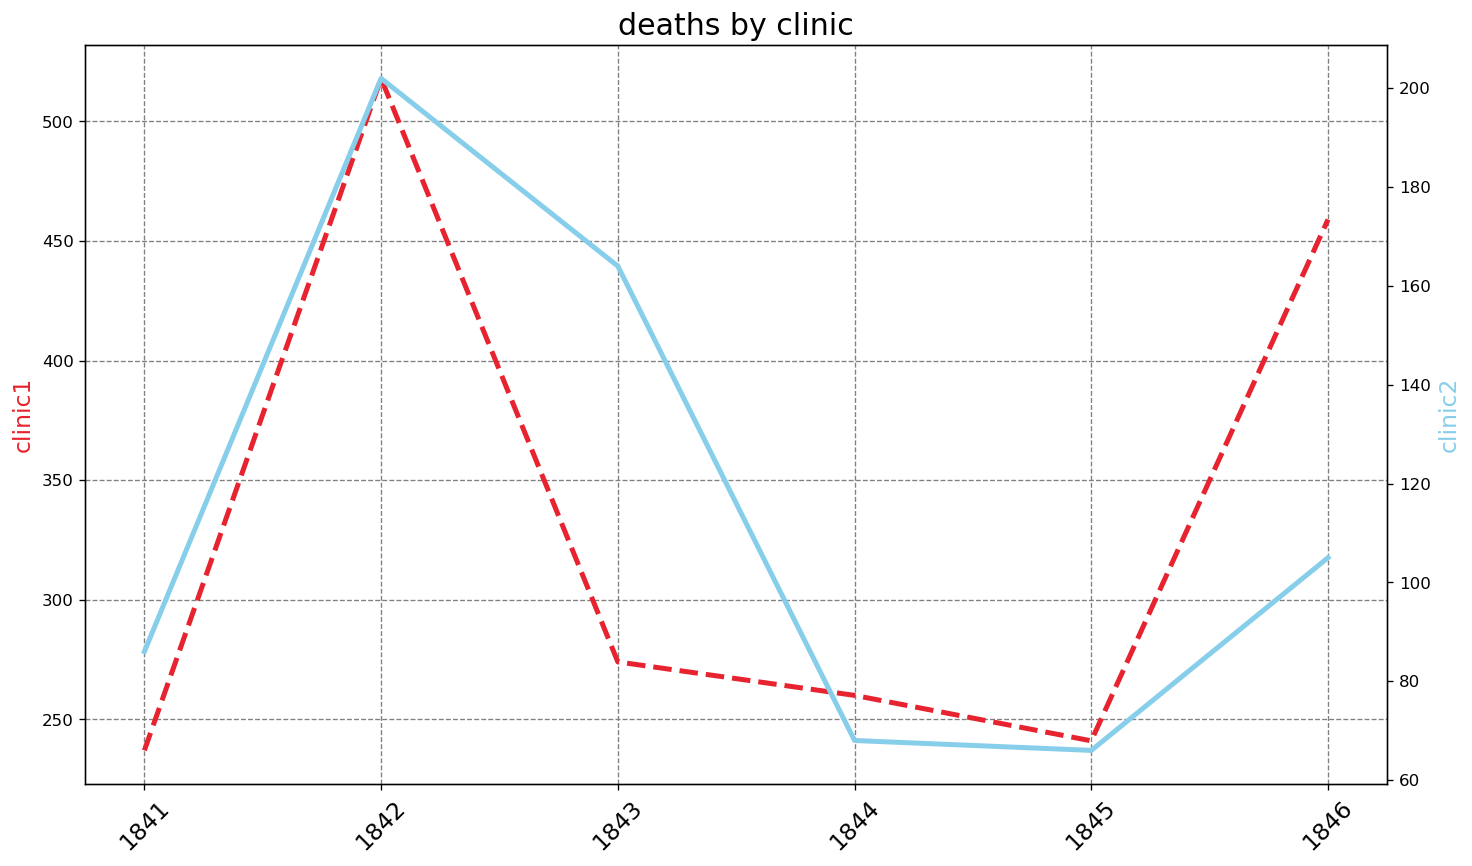

In [14]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('deaths by clinic', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('clinic1', color='#E6232E', fontsize=14)
ax2.set_ylabel('clinic2', color='skyblue', fontsize=14)

ax1.grid(color='grey', linestyle='--')

# Set the minimum and maximum values on the axes
ax1.plot(pivot_death.index, pivot_death["clinic 1"], color='#E6232E', linewidth=3, linestyle="--")
ax2.plot(pivot_death.index, pivot_death["clinic 2"], color='skyblue', linewidth=3)


plt.show()

In [15]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')
df_yearly

Average death rate in clinic 1 is 9.92%.


year  births  deaths    clinic  perc  pct_deaths
0   1841    3036     237  clinic 1  0.08        0.08
1   1842    3287     518  clinic 1  0.16        0.16
2   1843    3060     274  clinic 1  0.09        0.09
3   1844    3157     260  clinic 1  0.08        0.08
4   1845    3492     241  clinic 1  0.07        0.07
5   1846    4010     459  clinic 1  0.11        0.11
6   1841    2442      86  clinic 2  0.04        0.04
7   1842    2659     202  clinic 2  0.08        0.08
8   1843    2739     164  clinic 2  0.06        0.06
9   1844    2956      68  clinic 2  0.02        0.02
10  1845    3241      66  clinic 2  0.02        0.02
11  1846    3754     105  clinic 2  0.03        0.03

In [16]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
line.show()

### Calculate the Proportion of Deaths at Each Clinic

* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [17]:
df_monthly["pct_deaths"] = df_monthly.deaths / df_monthly.births

In [18]:
df_monthly

date  births  deaths  pct_deaths
0  1841-01-01     254      37        0.15
1  1841-02-01     239      18        0.08
2  1841-03-01     277      12        0.04
3  1841-04-01     255       4        0.02
4  1841-05-01     255       2        0.01
..        ...     ...     ...         ...
93 1848-11-01     310       9        0.03
94 1848-12-01     373       5        0.01
95 1849-01-01     403       9        0.02
96 1849-02-01     389      12        0.03
97 1849-03-01     406      20        0.05

[98 rows x 4 columns]

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [19]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [20]:
df_mont_pr = df_monthly[df_monthly.date < handwashing_start]
df_mont_po = df_monthly[df_monthly.date >= handwashing_start]


### Calculate a Rolling Average of the Death Rate

Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

In [21]:
roll_df = df_mont_pr.set_index("date")
roll_df = roll_df.rolling(window=6).mean()
roll_df


births  deaths  pct_deaths
date                                  
1841-01-01     NaN     NaN         NaN
1841-02-01     NaN     NaN         NaN
1841-03-01     NaN     NaN         NaN
1841-04-01     NaN     NaN         NaN
1841-05-01     NaN     NaN         NaN
...            ...     ...         ...
1847-01-01  274.50   29.00        0.11
1847-02-01  290.50   23.50        0.08
1847-03-01  296.17   18.83        0.07
1847-04-01  305.83   22.00        0.07
1847-05-01  305.33   22.67        0.07

[76 rows x 3 columns]

In [22]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 

### Highlighting Subsections of a Line Chart


* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 

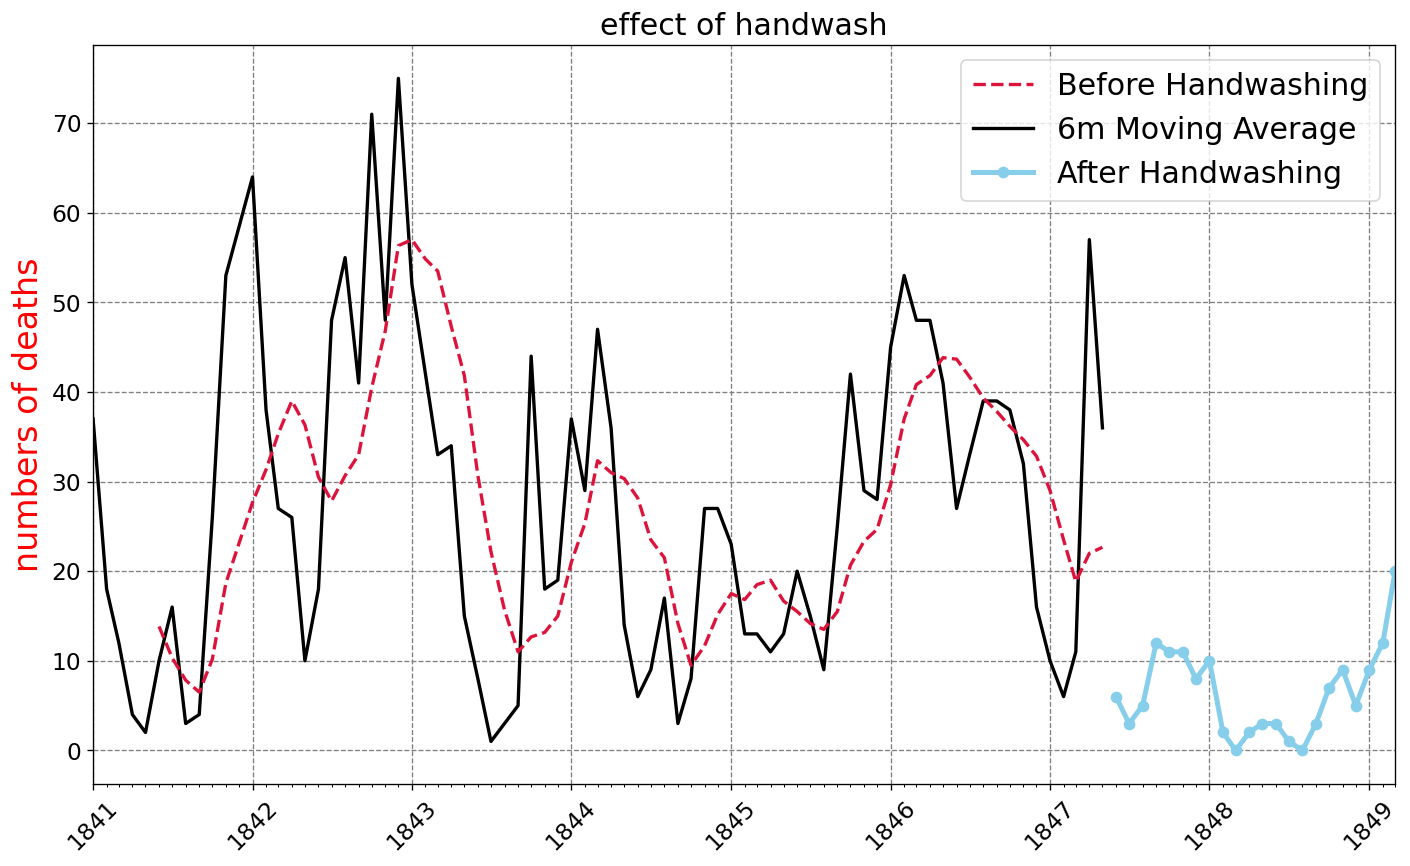

In [23]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('effect of handwash', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel("numbers of deaths", color="red", fontsize=20)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])


plt.grid(color='grey', linestyle='--')


# Set the minimum and maximum values on the axes
bw_line, = plt.plot(df_mont_pr.date, df_mont_pr.deaths, color='black', linewidth=2,
                    label='6m Moving Average')
ma_line,=plt.plot(roll_df.index, roll_df.deaths, color='crimson', linewidth=2, linestyle = "--", 
                    label='Before Handwashing')
aw_line, =plt.plot(df_mont_po.date, df_mont_po.deaths, color='skyblue', linewidth=3, marker="o",
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [24]:
print(df_mont_pr["deaths"].mean())
print(df_mont_po["deaths"].mean())

27.105263157894736
6.454545454545454


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?

In [27]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')
df_monthly

date  births  deaths  pct_deaths washing_hands
0  1841-01-01     254      37        0.15            No
1  1841-02-01     239      18        0.08            No
2  1841-03-01     277      12        0.04            No
3  1841-04-01     255       4        0.02            No
4  1841-05-01     255       2        0.01            No
..        ...     ...     ...         ...           ...
93 1848-11-01     310       9        0.03           Yes
94 1848-12-01     373       5        0.01           Yes
95 1849-01-01     403       9        0.02           Yes
96 1849-02-01     389      12        0.03           Yes
97 1849-03-01     406      20        0.05           Yes

[98 rows x 5 columns]

In [35]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
box.show()


# Use Histograms to Visualise the Monthly Distribution of Outcomes

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [61]:
df = px.data.tips()
# Here we use a column with categorical data
fig = px.histogram(df_monthly, x="pct_deaths",nbins=30,histnorm="percent",
                   opacity=0.6,barmode='overlay', color="washing_hands",marginal='box',
                  )
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
fig.show()

In [51]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


<Axes: xlabel='pct_deaths', ylabel='Density'>

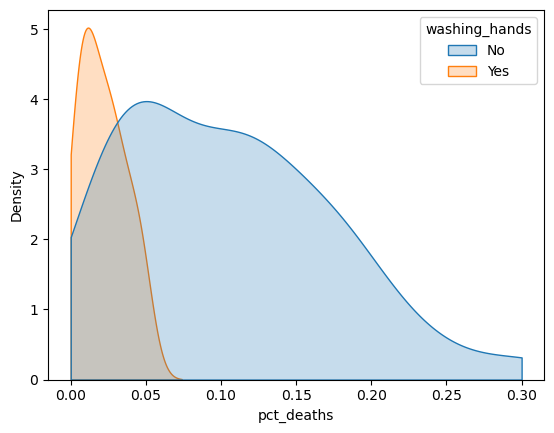

In [91]:
sns.kdeplot(df_monthly, x="pct_deaths",hue="washing_hands",fill=True,clip=(0, 0.30))


C:\Users\Daniele\AppData\Local\Temp\ipykernel_16668\189074640.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Daniele\AppData\Local\Temp\ipykernel_16668\189074640.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




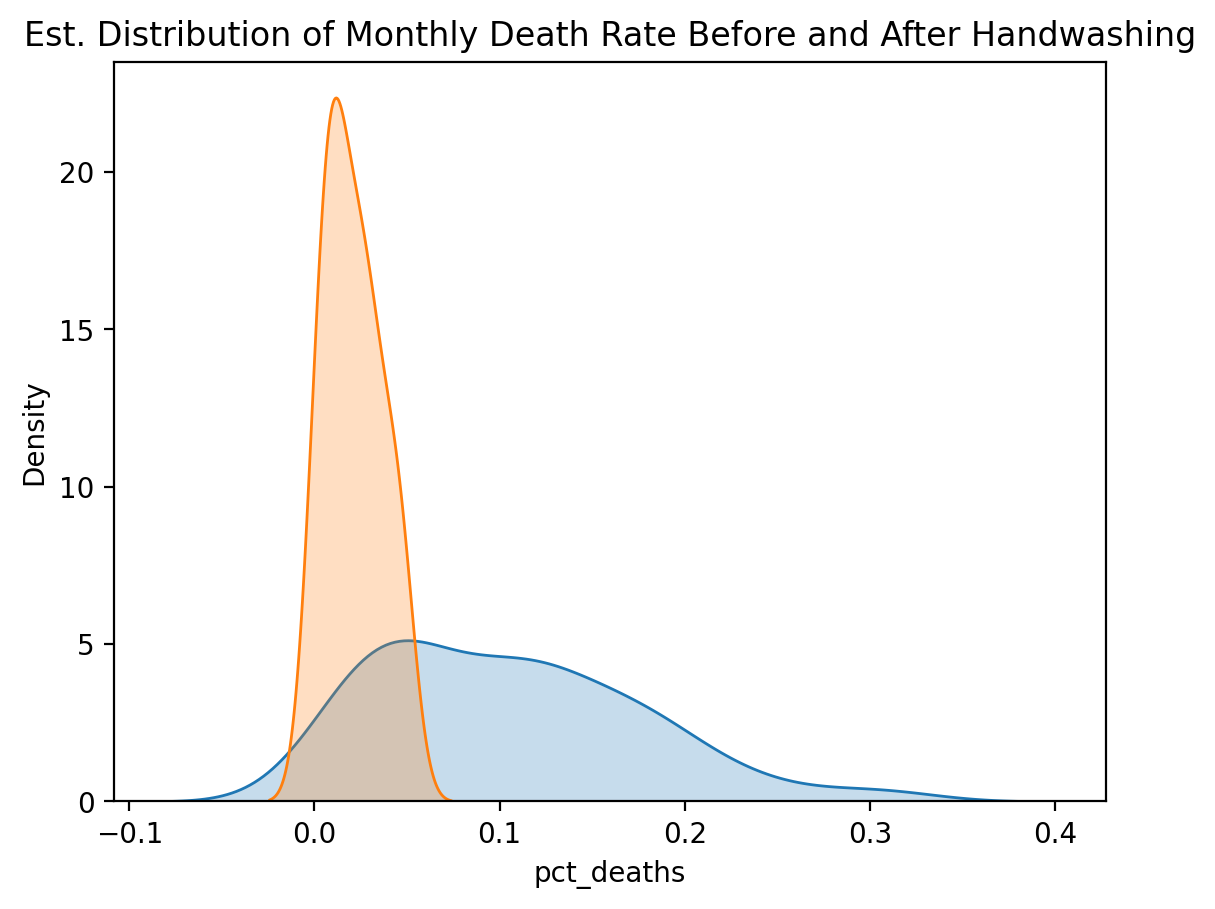

In [88]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(df_mont_pr.pct_deaths, shade=True)
sns.kdeplot(df_mont_po.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

C:\Users\Daniele\AppData\Local\Temp\ipykernel_16668\3946467353.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Daniele\AppData\Local\Temp\ipykernel_16668\3946467353.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




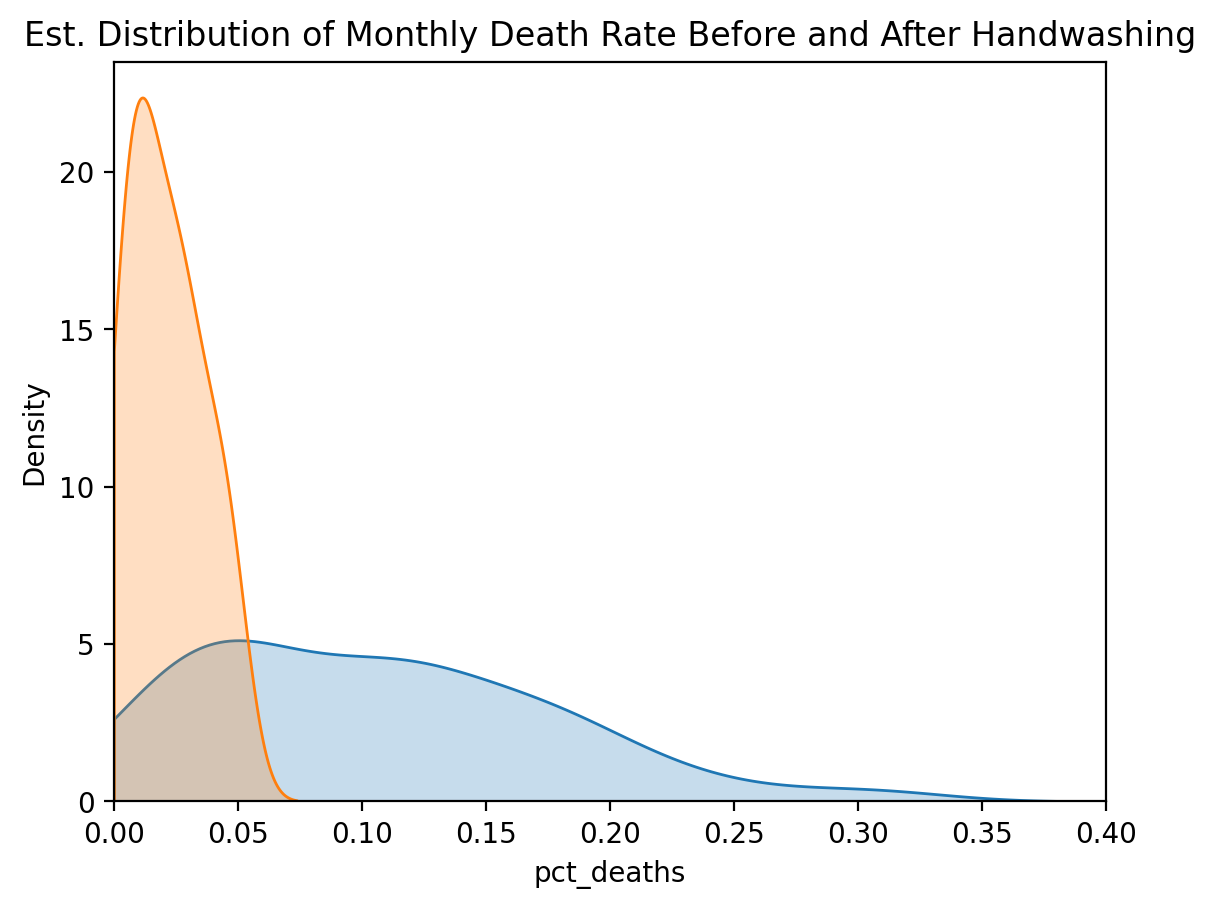

In [90]:
plt.figure(dpi=200)
sns.kdeplot(df_mont_pr.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(df_mont_po.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Use a T-Test to Show Statistical Significance

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 

In [95]:
from scipy import stats 

In [104]:
print(stats.ttest_ind(df_mont_pr.deaths,df_mont_po.deaths
               ))
t_stat, p_value = stats.ttest_ind(a=df_mont_pr.pct_deaths, 
                                  b=df_mont_po.pct_deaths) 
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

Ttest_indResult(statistic=5.323499861742658, pvalue=6.677631832844391e-07)
p-palue is 0.0000002985
t-statstic is 5.512


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>